## Introduction

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Assignment 1

In [4]:
# from google.colab import drive
# Google Colab
# drive.mount('/content/drive')
# dir = '/content/drive/MyDrive/Colab Notebooks/data/'
# Local enviromnent
dir = '/data/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data cleaning
### Read in and merge the two data sets (tip: think of different CSV formats that exist)

In [5]:
import seaborn as sns #this is the plotting library I'll be using 
import pandas as pd #"as pd" means that we can use the abbreviation in commands
import matplotlib.pyplot as plt #we need Matplotlib for setting the labels in the Seaborn graphs



In [6]:


df1 = pd.read_csv(dir + "survey.csv")
df1.head()

,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


In [7]:
df2 = pd.read_csv(dir + "steps.csv", sep = ";")
df2.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,29-6-2013,30-6-2013,1-7-2013,2-7-2013,3-7-2013,4-7-2013,5-7-2013,6-7-2013,7-7-2013,8-7-2013,9-7-2013,10-7-2013,11-7-2013,12-7-2013,13-7-2013,14-7-2013,15-7-2013,16-7-2013,17-7-2013,18-7-2013,19-7-2013,20-7-2013,21-7-2013,22-7-2013,23-7-2013,24-7-2013,25-7-2013,26-7-2013,27-7-2013,28-7-2013,...,4-4-2014,5-4-2014,6-4-2014,7-4-2014,8-4-2014,9-4-2014,10-4-2014,11-4-2014,12-4-2014,13-4-2014,14-4-2014,15-4-2014,16-4-2014,17-4-2014,18-4-2014,19-4-2014,20-4-2014,21-4-2014,22-4-2014,23-4-2014,24-4-2014,25-4-2014,26-4-2014,27-4-2014,28-4-2014,29-4-2014,30-4-2014,1-5-2014,2-5-2014,3-5-2014,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,15773.0,2795.0,10798.0,13885.0,9654.0,19481.0,8518.0,9385.0,30580.0,15490.0,5708.0,11983.0,14228.0,12205.0,14410.0,8667.0,NaN,10616.0,13538.0,12254.0,NaN,10410.0,9617.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,2952.0,4839.0,6181.0,6926.0,6589.0,8839.0,1370.0,5092.0,2589.0,8019.0,6712.0,2385.0,565.0,7369.0,4515.0,702.0,5320.0,5374.0,4234.0,3235.0,15960.0,38.0,1719.0,2005.0,7657.0,2001.0,4428.0,144.0,32.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,5700.0,3998.0,12073.0,23039.0,7650.0,9561.0,11100.0,7278.0,9523.0,10140.0,13779.0,13643.0,6861.0,12567.0,7108.0,10534.0,5490.0,11437.0,NaN,12287.0,8129.0,NaN,NaN,14498.0,NaN,9826.0,10453.0,11263.0,NaN,12592.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1113.0,NaN,1275.0,8255.0,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,NaN,3290.0,5297.0,6443.0,11396.0,2290.0,3737.0,3875.0,NaN,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5816.0,NaN,NaN,NaN,NaN,897.0,4492.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1198.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5988.0,2338.0,223.0,633.0,202.0,18392.0,6373.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1319.0,1198.0,NaN,2433.0,NaN,NaN,NaN,3173.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Merging 

In [8]:
# Merging based on the ID cell
raw_df = pd.merge(df1, df2, on = "id") #'id' is the common identifier
raw_df.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,29-6-2013,30-6-2013,1-7-2013,2-7-2013,3-7-2013,4-7-2013,5-7-2013,6-7-2013,7-7-2013,8-7-2013,9-7-2013,10-7-2013,11-7-2013,12-7-2013,13-7-2013,14-7-2013,15-7-2013,16-7-2013,17-7-2013,18-7-2013,19-7-2013,20-7-2013,...,4-4-2014,5-4-2014,6-4-2014,7-4-2014,8-4-2014,9-4-2014,10-4-2014,11-4-2014,12-4-2014,13-4-2014,14-4-2014,15-4-2014,16-4-2014,17-4-2014,18-4-2014,19-4-2014,20-4-2014,21-4-2014,22-4-2014,23-4-2014,24-4-2014,25-4-2014,26-4-2014,27-4-2014,28-4-2014,29-4-2014,30-4-2014,1-5-2014,2-5-2014,3-5-2014,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,15773.0,2795.0,10798.0,13885.0,9654.0,19481.0,8518.0,9385.0,30580.0,15490.0,5708.0,11983.0,14228.0,12205.0,14410.0,8667.0,NaN,10616.0,13538.0,12254.0,NaN,10410.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,2952.0,4839.0,6181.0,6926.0,6589.0,8839.0,1370.0,5092.0,2589.0,8019.0,6712.0,2385.0,565.0,7369.0,4515.0,702.0,5320.0,5374.0,4234.0,3235.0,15960.0,38.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,5700.0,3998.0,12073.0,23039.0,7650.0,9561.0,11100.0,7278.0,9523.0,10140.0,13779.0,13643.0,6861.0,12567.0,7108.0,10534.0,5490.0,11437.0,NaN,12287.0,8129.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1113.0,NaN,1275.0,8255.0,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,NaN,3290.0,5297.0,6443.0,11396.0,2290.0,3737.0,3875.0,NaN,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5816.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1198.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5988.0,2338.0,223.0,633.0,202.0,18392.0,6373.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1319.0,1198.0,NaN,2433.0,NaN,NaN,NaN,3173.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Clean the data: remove impossible values

In [9]:
raw_df.describe()

,id,hh_size,education,height,weight,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,29-6-2013,30-6-2013,1-7-2013,2-7-2013,3-7-2013,4-7-2013,5-7-2013,6-7-2013,7-7-2013,8-7-2013,9-7-2013,10-7-2013,11-7-2013,12-7-2013,13-7-2013,14-7-2013,15-7-2013,16-7-2013,17-7-2013,18-7-2013,19-7-2013,20-7-2013,21-7-2013,22-7-2013,23-7-2013,24-7-2013,...,4-4-2014,5-4-2014,6-4-2014,7-4-2014,8-4-2014,9-4-2014,10-4-2014,11-4-2014,12-4-2014,13-4-2014,14-4-2014,15-4-2014,16-4-2014,17-4-2014,18-4-2014,19-4-2014,20-4-2014,21-4-2014,22-4-2014,23-4-2014,24-4-2014,25-4-2014,26-4-2014,27-4-2014,28-4-2014,29-4-2014,30-4-2014,1-5-2014,2-5-2014,3-5-2014,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
count,929.000000,929.000000,929.000000,928.000000,927.000000,24.000000,243.000000,278.000000,296.000000,354.000000,353.000000,328.000000,380.000000,419.000000,302.000000,407.000000,429.000000,440.000000,455.000000,483.000000,506.000000,415.000000,389.000000,386.000000,367.000000,384.000000,373.000000,355.000000,317.000000,322.000000,380.000000,380.000000,314.000000,334.000000,328.000000,314.000000,303.000000,351.000000,356.000000,341.000000,...,113.000000,118.000000,110.000000,116.000000,130.000000,129.000000,127.000000,123.000000,123.000000,103.000000,98.000000,96.000000,99.000000,101.000000,108.000000,109.000000,124.000000,119.000000,136.000000,129.000000,106.000000,112.000000,134.000000,114.000000,122.000000,128.000000,91.000000,82.000000,92.000000,88.000000,83.000000,78.000000,56.000000,56.000000,49.000000,71.000000,86.000000,81.000000,66.000000,0.0
mean,465.000000,2.342304,2.530678,171.668103,72.833873,3642.416667,9034.724280,10889.636691,7402.847973,8110.370056,8690.810198,8362.570122,8261.913158,9231.391408,7202.258278,8688.633907,8477.979021,9244.577273,9067.969231,9800.538302,9063.011858,9286.448193,8286.071979,7847.546632,8203.092643,7868.104167,8121.394102,7769.464789,8624.649842,7647.127329,7926.389474,7246.365789,8015.484076,7068.167665,8637.862805,6370.449045,6995.795380,7181.894587,7856.073034,7423.495601,...,7625.106195,7087.728814,4877.609091,6237.232759,5602.376923,7330.395349,6748.519685,6852.333333,7520.479675,7020.796117,7309.234694,8128.614583,7071.393939,7478.544554,6845.777778,7789.715596,17426.741935,17984.571429,29415.617647,25632.209302,7807.009434,8782.107143,23103.447761,20770.754386,10358.786885,7533.414062,7917.527473,6937.512195,7654.293478,9531.727273,8466.686747,6897.923077,8434.303571,9870.107143,7209.693878,9570.690141,7614.848837,6805.925926,7505.530303,NaN
std,268.323499,1.226129,1.274491,9.080235,25.902717,3951.910368,6412.774483,6283.204309,6733.291773,5495.536639,4843.885824,5762.374515,4325.239676,5282.031304,5251.930917,6544.331262,6032.955150,5375.499465,5812.459428,6102.275783,5272.165096,6710.190323,6801.136038,4732.603761,5492.613877,5204.139429,5249.192941,5468.455057,7223.292829,6803.118486,5336.036979,5189.141997,5244.964579,4854.871149,5687.665347,5782.998273,6140.827276,5407.421825,5332.366917,5127.740958,...,4366.745499,7021.664600,5339.373315,5706.891732,4406.156094,4539.136890,4145.035529,5317.644916,6249.846043,6194.196718,4486.816663,4656.970066,5149.075562,6472.113362,5180.835978,5131.093936,126315.855411,128935.471528,169581.491778,150934.214400,3929.710656,5203.019249,120698.741886,131437.813596,8760.018839,6308.464201,5548.784312,8252.248397,4243.867121,6104.712735,6923.674171,5915.429173,4960.932295,6812.625746,7539.387846,7264.297875,5521.711875,8458.979146,4706.609481,NaN
min,1.000000,1.000000,1.000000,145.000000,6.000000,164.000000,67.000000,25.000000,43.000000,11.000000,154.000000,7.000000,4.000000,9.000000,6.000000,5.000000,11.000000,27.000000,6.000000,9.000000,19.000000,5.000000,6.000000,8.000000,10.000000,7.000000,6.000000,8.000000,23.000000,25.000000,6.000000,4.000000,26.000000,8.000000,10.000000,7.000000,4.000000,4.000000,32.000000,4.000000,...,102.000000,16.000000,6.000000,316.000000,7.000000,76.000000,67

From the description of the data, extraordinary high/low minimum and maximum weight / height values were found. To verify that, looking at the data visually makes it more clear, where outliers are, how many, and how far they are away from the rest of the data   

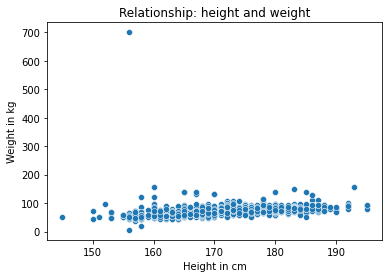

In [13]:
sns.scatterplot(x="height", y="weight", data=raw_df)
plt.title("Relationship: height and weight")
plt.xlabel("Height in cm")
plt.ylabel("Weight in kg")
plt.show()

The data visualization shows points with values above 700kg or 0kg, which, dealing with the fact that Jon Brower Minnoch with 635kg was the heaviest human ever recorded (https://en.wikipedia.org/wiki/Jon_Brower_Minnoch) can’t seem to be true. Therefore, these outliers were filtered out by refedining the data frame.

In [18]:
# cleaning unrealistic weights 
df = df[(df["weight"] < 200) & (df["weight"] > 35)]
# cleaning unrealistic height 
df = df[(df["height"] < 250) & (df["height"] > 50)]
df.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,29-6-2013,30-6-2013,1-7-2013,2-7-2013,3-7-2013,4-7-2013,5-7-2013,6-7-2013,7-7-2013,8-7-2013,9-7-2013,10-7-2013,11-7-2013,12-7-2013,13-7-2013,14-7-2013,15-7-2013,16-7-2013,17-7-2013,18-7-2013,19-7-2013,20-7-2013,...,7-4-2014,8-4-2014,9-4-2014,10-4-2014,11-4-2014,12-4-2014,13-4-2014,14-4-2014,15-4-2014,16-4-2014,17-4-2014,18-4-2014,19-4-2014,20-4-2014,21-4-2014,22-4-2014,23-4-2014,24-4-2014,25-4-2014,26-4-2014,27-4-2014,28-4-2014,29-4-2014,30-4-2014,1-5-2014,2-5-2014,3-5-2014,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,bmi,mean_steps,lazy_days
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,0.0,0.0,0.0,0.0,3941.0,15733.0,9929.0,12879.0,10541.0,15773.0,2795.0,10798.0,13885.0,9654.0,19481.0,8518.0,9385.0,30580.0,15490.0,5708.0,11983.0,14228.0,12205.0,14410.0,8667.0,0.0,10616.0,13538.0,12254.0,0.0,10410.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.930438,5133.875000,163
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,0.0,0.0,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,2952.0,4839.0,6181.0,6926.0,6589.0,8839.0,1370.0,5092.0,2589.0,8019.0,6712.0,2385.0,565.0,7369.0,4515.0,702.0,5320.0,5374.0,4234.0,3235.0,15960.0,38.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.765432,2826.371951,165
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,0.0,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,5700.0,3998.0,12073.0,23039.0,7650.0,9561.0,11100.0,7278.0,9523.0,10140.0,13779.0,13643.0,6861.0,12567.0,7108.0,10534.0,5490.0,11437.0,0.0,12287.0,8129.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1113.0,0.0,1275.0,8255.0,3914.0,4364.0,0.0,0.0,0.0,6227.0,4567.0,2567.0,1129.0,0.0,25.617284,3745.902439,180
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,3290.0,5297.0,6443.0,11396.0,2290.0,3737.0,3875.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5816.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1198.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.249337,221.536585,308
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,633.0,202.0,18392.0,6373.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1319.0,1198.0,0.0,2433.0,0.0,0.0,0.0,3173.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.872423,874.557927,274


### Creating custom variables
- BMI
- Mean steps per participant
- "Lazy days" / total inactive days per participant

In [14]:
df = raw_df
df = df.fillna(0)

# Add BMI as dependant variable 
df["bmi"] = df["weight"]/((df["height"]/100)*df["height"]/100)

# Add mean_steps
for i in df["id"]:
    # defining regex date format to select all columns with relevant data (so data could be added)
    match_date_format = '^([0-3]?\d\-{1})([01]?\d\-{1})([12]{1}\d{3}\-?)'
    df["mean_steps"] = df.loc[:, df.columns.str.match(match_date_format)].mean(axis=1)
    
# Add lazy_days
for i in df["id"]:
  df['lazy_days'] = (df == 0).sum(axis = 1)    


In [16]:

for i in df["id"]:
    # defining regex date format to select all columns with relevant data (so data could be added)
    match_date_format = '^([0-3]?\d\-{1})([01]?\d\-{1})([12]{1}\d{3}\-?)'
    df["mean_steps"] = df.loc[:, df.columns.str.match(match_date_format)].mean(axis=1)
    

### Show the head() of the resulting data frame

In [15]:
df.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,29-6-2013,30-6-2013,1-7-2013,2-7-2013,3-7-2013,4-7-2013,5-7-2013,6-7-2013,7-7-2013,8-7-2013,9-7-2013,10-7-2013,11-7-2013,12-7-2013,13-7-2013,14-7-2013,15-7-2013,16-7-2013,17-7-2013,18-7-2013,19-7-2013,20-7-2013,...,7-4-2014,8-4-2014,9-4-2014,10-4-2014,11-4-2014,12-4-2014,13-4-2014,14-4-2014,15-4-2014,16-4-2014,17-4-2014,18-4-2014,19-4-2014,20-4-2014,21-4-2014,22-4-2014,23-4-2014,24-4-2014,25-4-2014,26-4-2014,27-4-2014,28-4-2014,29-4-2014,30-4-2014,1-5-2014,2-5-2014,3-5-2014,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,bmi,mean_steps,lazy_days
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,0.0,0.0,0.0,0.0,3941.0,15733.0,9929.0,12879.0,10541.0,15773.0,2795.0,10798.0,13885.0,9654.0,19481.0,8518.0,9385.0,30580.0,15490.0,5708.0,11983.0,14228.0,12205.0,14410.0,8667.0,0.0,10616.0,13538.0,12254.0,0.0,10410.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.930438,5133.875000,163
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,0.0,0.0,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,2952.0,4839.0,6181.0,6926.0,6589.0,8839.0,1370.0,5092.0,2589.0,8019.0,6712.0,2385.0,565.0,7369.0,4515.0,702.0,5320.0,5374.0,4234.0,3235.0,15960.0,38.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.765432,2826.371951,165
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,0.0,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,5700.0,3998.0,12073.0,23039.0,7650.0,9561.0,11100.0,7278.0,9523.0,10140.0,13779.0,13643.0,6861.0,12567.0,7108.0,10534.0,5490.0,11437.0,0.0,12287.0,8129.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1113.0,0.0,1275.0,8255.0,3914.0,4364.0,0.0,0.0,0.0,6227.0,4567.0,2567.0,1129.0,0.0,25.617284,3745.902439,180
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,3290.0,5297.0,6443.0,11396.0,2290.0,3737.0,3875.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5816.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1198.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.249337,221.536585,308
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,633.0,202.0,18392.0,6373.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1319.0,1198.0,0.0,2433.0,0.0,0.0,0.0,3173.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.872423,874.557927,274


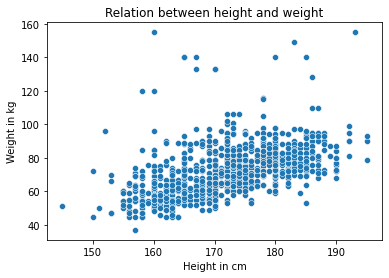

In [19]:
sns.scatterplot(x="height", y="weight", data=df)
plt.title("Relation between height and weight")
plt.xlabel("Height in cm")
plt.ylabel("Weight in kg")
plt.show()

## Feature engineering
- The prediction of the model can be improved by computing a variable that gives a better indication of a healthy weight than weight alone. Can you think of one? If not, just skip this step.

The BMI can be used as an indication of a healthy weight.

## Exploratory data analysis
Do your exploratory data analysis to determine what variables you want to use and how.

- Graph of the relation (e.g. histograms, box plots, density plots, violin plots). Try a different plot this time.
- Describe and interpret the results

- See last week for the first part (distribution of steps). In addition:
- Make a scatterplot matrix of the numerical variables
- Make a correlation matrix of the numerical variables
- Describe and interpret the results



### An analysis of mean steps per participant:


- Graph of the distribution (e.g., histogram, box plot, density plot, violin plot)
- Summary statistics (measure of central tendency and variation, e.g., mean, median, variance)
- Verbal description of the distribution, including commenting on normality, skewness, outliers, etc.

To gain an initial overview, I have plotted a summary of all participants and their mean steps.



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


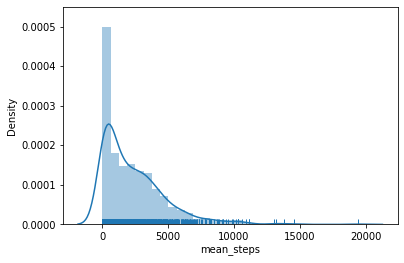

In [20]:
# df_sel = df[['mean_steps', 'id']]
sns.distplot(df.mean_steps, rug=True)
plt.show() #using Matplotlib to show the plot

What we see here is a right skewed distribution. 
**bold text**
Right at the beginning, we see a particularly high number of participants with only a few steps per day. This suggests that participants have already given up at the beginning of the study.  

In [21]:

df = df[df.mean_steps > 100.0]



### The relation of mean steps per participant with gender

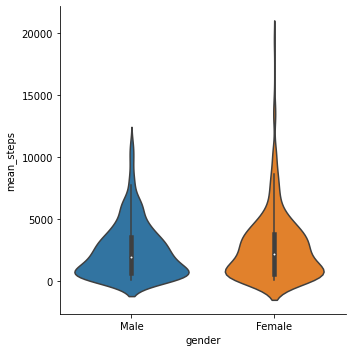

In [22]:
sns.catplot(x="gender", y="mean_steps", kind="violin", data=df)


### Impact of the city

As someone who is very interested in urban planning, I find the potential discrepancy of steps walked depending on the city generally very intriguing.  However, we are talking about 4 comparable cities in France - both in terms of population (~300,000) and walkability of the cities. Therefore, the differences here seem to be correspondingly small. Too small to using it for a prediction model.

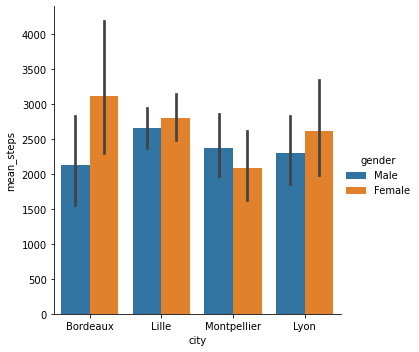

In [23]:
sns.catplot(x="city", y="mean_steps", kind="bar", hue="gender", data=df)
plt.show()

### Impact of education

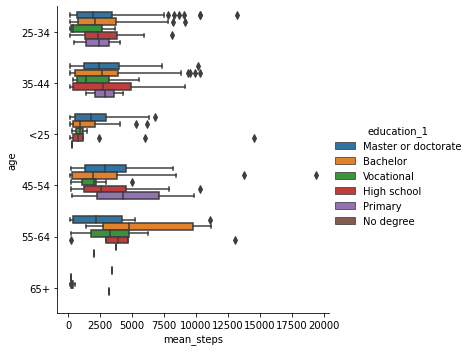

In [ ]:
sns.catplot(x='mean_steps', y='age', data=df, kind="box", hue='education_1')


Evaluating the potential impact of education on mean_steps reveals that participants with Bachelor, Master or Doctorate degree tend to have a higher average in steps in the younger and older age groups, yet looking at the age group 45-54, people with primary school education show a comparably high amount in steps.

Of course, this raises questions about how, for example, the daily lives of people with different levels of education differ. For example, I could imagine that people with a higher level of education work mainly in office jobs, while people with a lower level of education tend to work in practical jobs with more physical labor, which naturally leads to a higher amount of steps.

Another explanation could be that simply the dataset is very thin for Primary school participants:

In [ ]:
df['education_1'].value_counts()

Master or doctorate    376
Bachelor               322
High school             93
Vocational              36
Primary                 10
No degree                1
Name: education_1, dtype: int64

As it turns out, the amout of participants between the education levels between participants differ quite alot, which is why the comparability is questionable

Therefore I will use the "gender" category for now:

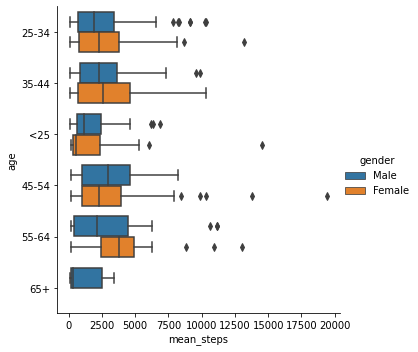

In [ ]:
sns.catplot(x='mean_steps', y='age', data=df, kind="box", hue='gender')


The majority of outliers in all age groups were women. Female participants had a higher average number of steps in all age groups except those under 25 and those 45-54.


In [ ]:
df_mean = df['mean_steps'].sort_values(ascending = False)

df_mean


109    19430.237805
205    14538.682927
907    13775.759146
95     13196.155488
481    13051.253049
           ...     
398      104.905488
154      102.731707
613      101.731707
728      100.301829
85       100.286585
Name: mean_steps, Length: 838, dtype: float64

###Scatterplot Matrix


The scatterplot matrix is a technique for visualizing multivariate data in the form of a scatterplot where each observation is represented by a point. 

It can give us a good overview over the relationship between categories 

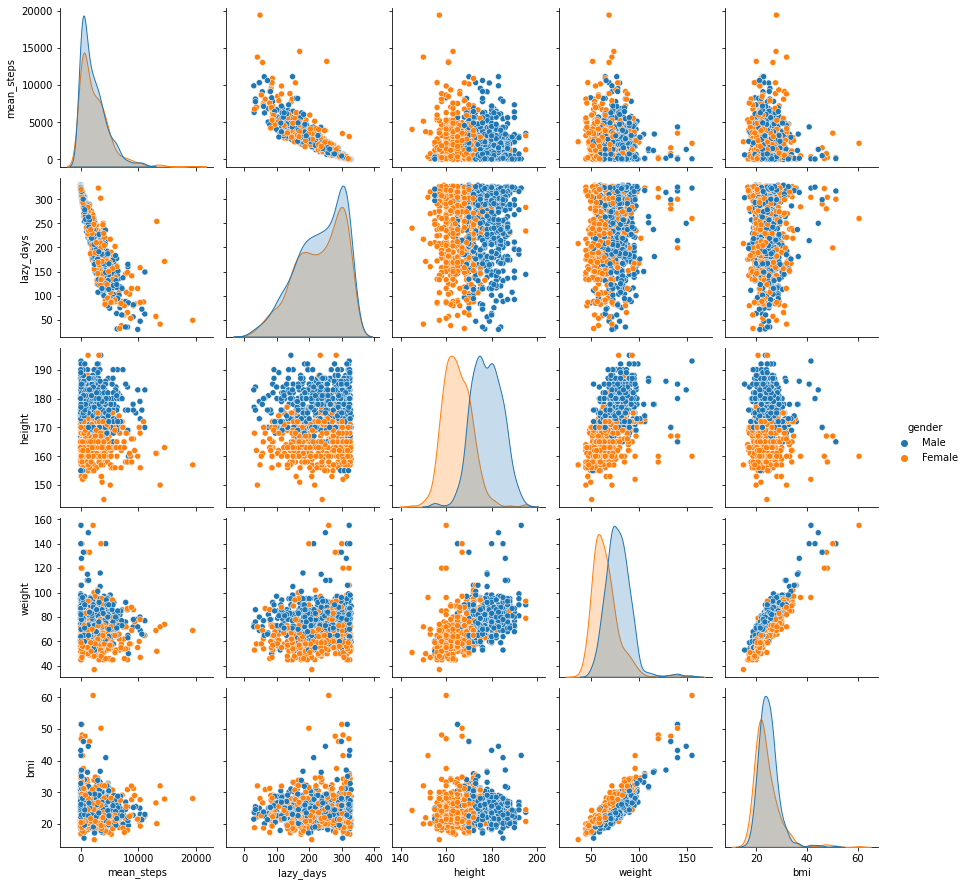

In [ ]:
df_sel = df[['mean_steps', 'lazy_days','height','weight', 'gender', 'bmi']]
sns.pairplot(df_sel, hue ='gender')
plt.show() #using Matplotlib to show the plot

One graph that immediately caught my eye  is how particularly women with high amount of "lazy_days" are still more likely able to compensate those inactive days according to their "mean_steps" than men. I was wondering, whether this might have something to do with different body conditions such as the menstrual cycle.

Furthermore it is visible that people with higher weight not only tend to have a lower mean in steps but also score a higher amount of "lazy_days" (days with 0 activity). 

A design challenge we could derive from this data is e.g. "How might we enable people with higher weight to build a habit around collecting steps on a daily basis"

## Predictive model - Predicting lazy_days based on bmi
Since the prediction of categorical values such as gender, city, or education level did not suggest a particularly high accuracy due to the data situation, I decided to calculate the prediction of "lazy_days" based on BMI for now. 

### Linear regression

Linear regression is a technique to **predict how one variable is related to another**. Based on the data present a linear equation can be derived. It can be used to answer questions such as "how does the weight of a person change with age?" or "how does living in city x - or in the province influence how many steps people walk?"






- Create dummy variables for the categorical variables

"Dummy variables" can be used to take advantage of categorical variables in a linear regression, where they are not natively supported





- Fit a linear regression model to predict the **mean steps per participant**, using the training data. You can include all variables (easy), or you can try to find the combination that gives you the best fit (harder).

In [24]:
from sklearn.linear_model import LinearRegression
bmi = df[['bmi']] 
lz = df['lazy_days']
lm = LinearRegression() 
lm.fit(bmi, lz) 

b0 = lm.intercept_ 
b1 = lm.coef_[0]

df["pd_lazy_days"] = lm.predict(bmi) 
df.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,29-6-2013,30-6-2013,1-7-2013,2-7-2013,3-7-2013,4-7-2013,5-7-2013,6-7-2013,7-7-2013,8-7-2013,9-7-2013,10-7-2013,11-7-2013,12-7-2013,13-7-2013,14-7-2013,15-7-2013,16-7-2013,17-7-2013,18-7-2013,19-7-2013,20-7-2013,...,8-4-2014,9-4-2014,10-4-2014,11-4-2014,12-4-2014,13-4-2014,14-4-2014,15-4-2014,16-4-2014,17-4-2014,18-4-2014,19-4-2014,20-4-2014,21-4-2014,22-4-2014,23-4-2014,24-4-2014,25-4-2014,26-4-2014,27-4-2014,28-4-2014,29-4-2014,30-4-2014,1-5-2014,2-5-2014,3-5-2014,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,bmi,mean_steps,lazy_days,pd_lazy_days
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,0.0,0.0,0.0,0.0,3941.0,15733.0,9929.0,12879.0,10541.0,15773.0,2795.0,10798.0,13885.0,9654.0,19481.0,8518.0,9385.0,30580.0,15490.0,5708.0,11983.0,14228.0,12205.0,14410.0,8667.0,0.0,10616.0,13538.0,12254.0,0.0,10410.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.930438,5133.875000,163,230.931749
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,0.0,0.0,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,2952.0,4839.0,6181.0,6926.0,6589.0,8839.0,1370.0,5092.0,2589.0,8019.0,6712.0,2385.0,565.0,7369.0,4515.0,702.0,5320.0,5374.0,4234.0,3235.0,15960.0,38.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.765432,2826.371951,165,222.419539
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,0.0,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,5700.0,3998.0,12073.0,23039.0,7650.0,9561.0,11100.0,7278.0,9523.0,10140.0,13779.0,13643.0,6861.0,12567.0,7108.0,10534.0,5490.0,11437.0,0.0,12287.0,8129.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1113.0,0.0,1275.0,8255.0,3914.0,4364.0,0.0,0.0,0.0,6227.0,4567.0,2567.0,1129.0,0.0,25.617284,3745.902439,180,224.619586
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,3290.0,5297.0,6443.0,11396.0,2290.0,3737.0,3875.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5816.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1198.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.249337,221.536585,308,224.182456
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,202.0,18392.0,6373.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1319.0,1198.0,0.0,2433.0,0.0,0.0,0.0,3173.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.872423,874.557927,274,220.170595


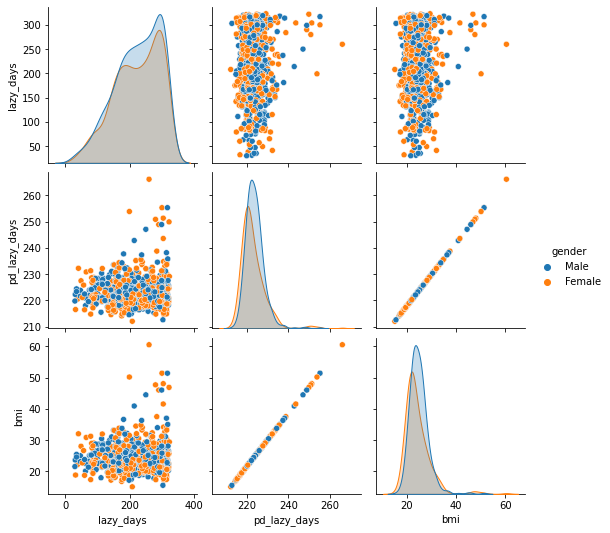

,id,hh_size,education,height,weight,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,29-6-2013,30-6-2013,1-7-2013,2-7-2013,3-7-2013,4-7-2013,5-7-2013,6-7-2013,7-7-2013,8-7-2013,9-7-2013,10-7-2013,11-7-2013,12-7-2013,13-7-2013,14-7-2013,15-7-2013,16-7-2013,17-7-2013,18-7-2013,19-7-2013,20-7-2013,21-7-2013,22-7-2013,23-7-2013,24-7-2013,...,9-4-2014,10-4-2014,11-4-2014,12-4-2014,13-4-2014,14-4-2014,15-4-2014,16-4-2014,17-4-2014,18-4-2014,19-4-2014,20-4-2014,21-4-2014,22-4-2014,23-4-2014,24-4-2014,25-4-2014,26-4-2014,27-4-2014,28-4-2014,29-4-2014,30-4-2014,1-5-2014,2-5-2014,3-5-2014,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,bmi,mean_steps,lazy_days,pd_lazy_days,resid
count,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,...,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.0,838.000000,838.000000,838.000000,838.000000,8.380000e+02
mean,464.084726,2.344869,2.536993,171.678998,72.157518,104.317422,2582.989260,3565.230310,2599.527446,3369.163484,3612.452267,3204.959427,3685.553699,4541.292363,2572.087112,4131.791169,4259.713604,4782.145585,4841.241050,5552.263723,5386.880668,4536.270883,3767.050119,3573.004773,3532.792363,3562.897375,3573.082339,3239.235084,3214.331742,2877.286396,3561.474940,3254.818616,2971.483294,2769.520286,3310.223150,2361.911695,2512.632458,2917.720764,3289.343675,2986.727924,...,1103.498807,1013.297136,970.291169,1070.707637,836.998807,832.273270,913.391408,827.576372,895.554893,871.147971,1003.519093,2566.066826,2538.169451,4773.847255,3913.832936,976.281623,1153.313842,3595.276850,2776.392601,1508.081146,1150.688544,859.779236,678.849642,840.328162,1000.945107,838.585919,642.050119,563.628878,659.577566,421.569212,810.881862,781.476134,651.743437,579.732697,0.0,24.414738,2582.808265,223.190931,223.190931,-2.441961e-15
std,266.714519,1.220755,1.270167,9.051205,15.139779,893.691054,5338.866117,6252.936346,5332.959706,5324.057088,5273.882249,5371.041472,5011.474742,5909.963396,4665.641764,6210.492212,5995.810669,5993.876789,6198.919782,6661.534359,6030.907740,6615.050510,6159.889648,5063.866640,5436.897877,5273.769883,5311.694246,5218.680545,6086.981670,5562.945885,5330.414975,5017.738584,5029.575708,4612.699887,5490.465134,4689.482264,4982.793459,4932.029294,5193.129520,4880.608385,...,3156.665041,2900.471853,3076.709512,3513.699106,3118.643308,2771.041772,3011.772960,2882.084526,3306.137089,2943.518162,3201.784447,48817.270225,48818.165048,68964.817987,59746.959284,2931.857468,3497.062574,48852.698765,48818.397132,4945.408504,3659.474688,3063.658135,3293.030693,2773.252396,3524.589482,3331.789801,2690.819085,2461.430471,3021.933361,2474.845604,3394.837217,2905.646727,3296.237327,2391.003006,0.0,4.606369,2414.291112,70.163416,5.472484,6.994967e+01
min,1.000000,1.000000,1.000000,145.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

In [28]:
df["resid"] = df["lazy_days"] - df["pd_lazy_days"]

df_sel = df[[ 'lazy_days','pd_lazy_days','bmi', 'gender']]

sns.pairplot(df_sel, hue="gender")
plt.show()
df.describe()


## Evaluation
- Evaluate the model on the test data
- Predictive power of the model (R2, RMSE)
- Investigate the residuals
- Describe and interpret the results

In [26]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
print("R squared:", str(r2_score(df["lazy_days"], df['pd_lazy_days'])))
print("RSME = ", str(sqrt(mean_squared_error(df["lazy_days"], df["pd_lazy_days"]))))

R squared: 0.006083416225460603
RSME =  69.90792536521667


## Conclusion

An RSME value ranging from 0.2 to 0.5 or r-squared value from 0.7 would generally be seen as showing a high level of correlation and thus be considered as good foundation for an accurate prediction model. 

[https://www.researchgate.net/post/Whats-the-acceptable-value-of-Root-Mean-Square-Error-RMSE-Sum-of-Squares-due-to-error-SSE-and-Adjusted-R-square#:~:text=Based on a rule of,more is acceptable as well](https://www.researchgate.net/post/Whats-the-acceptable-value-of-Root-Mean-Square-Error-RMSE-Sum-of-Squares-due-to-error-SSE-and-Adjusted-R-square#:~:text=Based%20on%20a%20rule%20of,more%20is%20acceptable%20as%20well)

With an R squared value of 0.0061 and a RSME value of 69.90, my model is pretty far off and there is no doubt in this  model being inaccurate. 

Nevertheless, I find it fascinating that despite the only slightly discernible correlation between BMI and lazy_days from the graph, a certain tendency could be derived after all (pd_lazy_days ranges between 212.0 and 266.11). The numbers are partly far away from the real numbers, but often point in the right direction. Thus am curious to see and compare what other classmates came up with / what the best practice for this particular assignment looked like. That's how I learn best. I might be good with coding in general but when it comes to mathematics, I need time, trial and error and examples from others. :D